# Timer

In [35]:
import os   
import subprocess 
import random

timeout = 3    
models_folder = '../models'  
models = [os.path.join(models_folder, f) for f in os.listdir(models_folder) if f.endswith('.mzn')]
random.shuffle(models)
instances_folder = '../instances'
instances = [os.path.join(instances_folder, f) for f in os.listdir(instances_folder) if f.endswith('.dzn')][:10]
# Remember, you are missing the stastic sample, calculate this number using len(instances) 
times = [0] * len(models)

for i, model in enumerate(models):
    for instance in instances:
        # Run the minizinc command for the current model and data file  
        cmd = f"minizinc --solver Gecode --output-time {model} {instance}" 
        proc = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE)
        try: 
            # Get output from fzn
            stdout, stderr = proc.communicate(timeout=timeout)
            elapsed_time = float(stdout.decode().split(' ')[-2])
            
            print(f'{model} with {instance} SOLVED in {elapsed_time:.2f} seconds.')
            times[i] = (times[i]+elapsed_time)/2
        except subprocess.TimeoutExpired: 
            print(f'{model} with {instance} TIMED OUT after {timeout} seconds.')
            times[i] = (times[i]+timeout)/2
            if os.name == 'nt': # If the os is Windows
                subprocess.call(['taskkill', '/F', '/T', '/PID', str(proc.pid)]) # Force kill the process
            else:
                os.killpg(os.getpgid(proc.pid), signal.SIGTERM) # Kill the process group
print("----FINISHED----")


../models\anti_first_fail-indomain.mzn with ../instances\0.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\1.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\10.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\100.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\101.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\102.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\103.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\104.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\105.dzn SOLVED in 0.07 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\106.dzn SOLVED in 0.07 seconds.
../models\smallest-indomain_split.mzn with ../instances\0.dzn SOLVED in 0.07 seconds.
../models\smallest-indomain_s

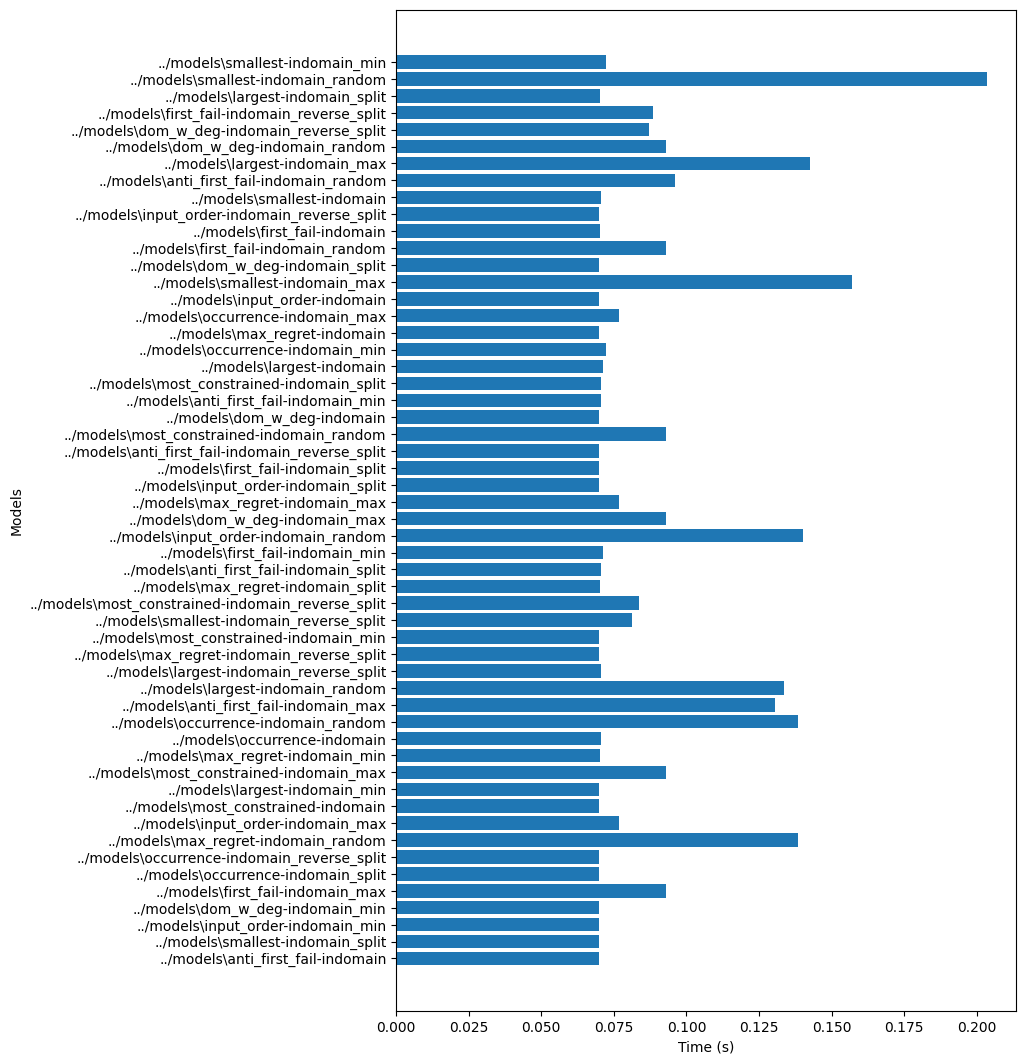

In [36]:
import matplotlib.pyplot as plt 

# Define figure size
fig, ax = plt.subplots(figsize=(8, 13))

# Filter models and times
models = [model for i, model in enumerate(models) if times[i] < timeout] 
models = [model.replace("../models/", "").replace(".mzn", "") for model in models]
times = [time for time in times if time < timeout]

# Use barh function to create horizontal bar chart
ax.barh(models, times)

# Set x-axis label and y-axis label
ax.set_xlabel('Time (s)')
ax.set_ylabel('Models')

# Show the plot
plt.show()


In [ ]:
import psutil

for proc in psutil.process_iter(['pid', 'name', 'username']):
    try:
        pinfo = proc.as_dict(attrs=['pid', 'name', 'username'])
        if 'jupyter' in pinfo['name']:
            print(pinfo)
    except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
        pass


{'name': 'jupyter-lab.exe', 'pid': 4448, 'username': 'DESKTOP-IH8383S\\juanj'}
{'name': 'jupyter.exe', 'pid': 8888, 'username': 'DESKTOP-IH8383S\\juanj'}
